In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis")
print(os.getcwd())

E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Research\JRF\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4
from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import cartopy.feature as cfeature
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
import scienceplots
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches  # For creating country legend handles
from matplotlib.patches import Circle
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy

#Trend
import xarrayMannKendall as XMK
import dask
from dask import delayed
import graphviz

# Styling and font settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-white')

C:\Users\sstar\AppData\Local\Temp\ipykernel_6028\4121256301.py:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [4]:
lulc=xr.open_mfdataset('DATA_p\LULC\ESRI_LULC_reclassified.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

soil=xr.open_mfdataset('DATA_p/Physiography/1_texture_classes.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

# Step 2: Check for and remove any duplicate index values (x and y)
lulc = lulc.isel(x=~lulc.get_index("x").duplicated(), y=~lulc.get_index("y").duplicated())
soil = soil.isel(x=~soil.get_index("x").duplicated(), y=~soil.get_index("y").duplicated())



soil=soil.sel(y=lulc.y.values,x=lulc.x.values,method='nearest')
#lulc=lulc.sel(y=soil.y.values,x=soil.x.values,method='nearest')



## 1_SCN curve number



In [5]:
lulc1=lulc['class_6']
soil1=soil['HSG_class']



array([ 1.,  2.,  3.,  4., nan])

In [6]:
# Step 2: Define the Curve Number lookup function
def get_curve_number(lulc_class, hsg_group):
    if lulc_class == 10:  # Built-up
        if hsg_group == 1: return 63
        if hsg_group == 2: return 75
        if hsg_group == 3: return 88
        if hsg_group == 4: return 90
        
    elif lulc_class == 20:  # Agricultural
        if hsg_group == 1: return 50
        if hsg_group == 2: return 69
        if hsg_group == 3: return 78
        if hsg_group == 4: return 85

    elif lulc_class == 30:  # Evergreen Broadleaf Forest
        if hsg_group == 1: return 34
        if hsg_group == 2: return 60
        if hsg_group == 3: return 73
        if hsg_group == 4: return 79

    elif lulc_class == 40:  # Shrubland/Wasteland
        if hsg_group == 1: return 48
        if hsg_group == 2: return 68
        if hsg_group == 3: return 75
        if hsg_group == 4: return 80

    elif lulc_class == 50:  # Water Bodies
        if hsg_group == 1: return 97
        if hsg_group == 2: return 98
        if hsg_group == 3: return 99
        if hsg_group == 4: return 100

    elif lulc_class == 60:  # Snow and Ice/Glacier
        if hsg_group == 1: return 67
        if hsg_group == 2: return 77
        if hsg_group == 3: return 82
        if hsg_group == 4: return 84

    return np.nan  # Return NaN for undefined combinations

# Step 3: Vectorize the function
vectorized_get_curve_number = np.vectorize(get_curve_number)

# Step 4: Apply the vectorized function
curve_numbers = vectorized_get_curve_number(lulc1, soil1)

cn_da = xr.DataArray(curve_numbers, coords=soil1.coords, dims=soil1.dims)

## PLOT

C:\Users\sstar\AppData\Local\Temp\ipykernel_6028\1468714287.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, '')

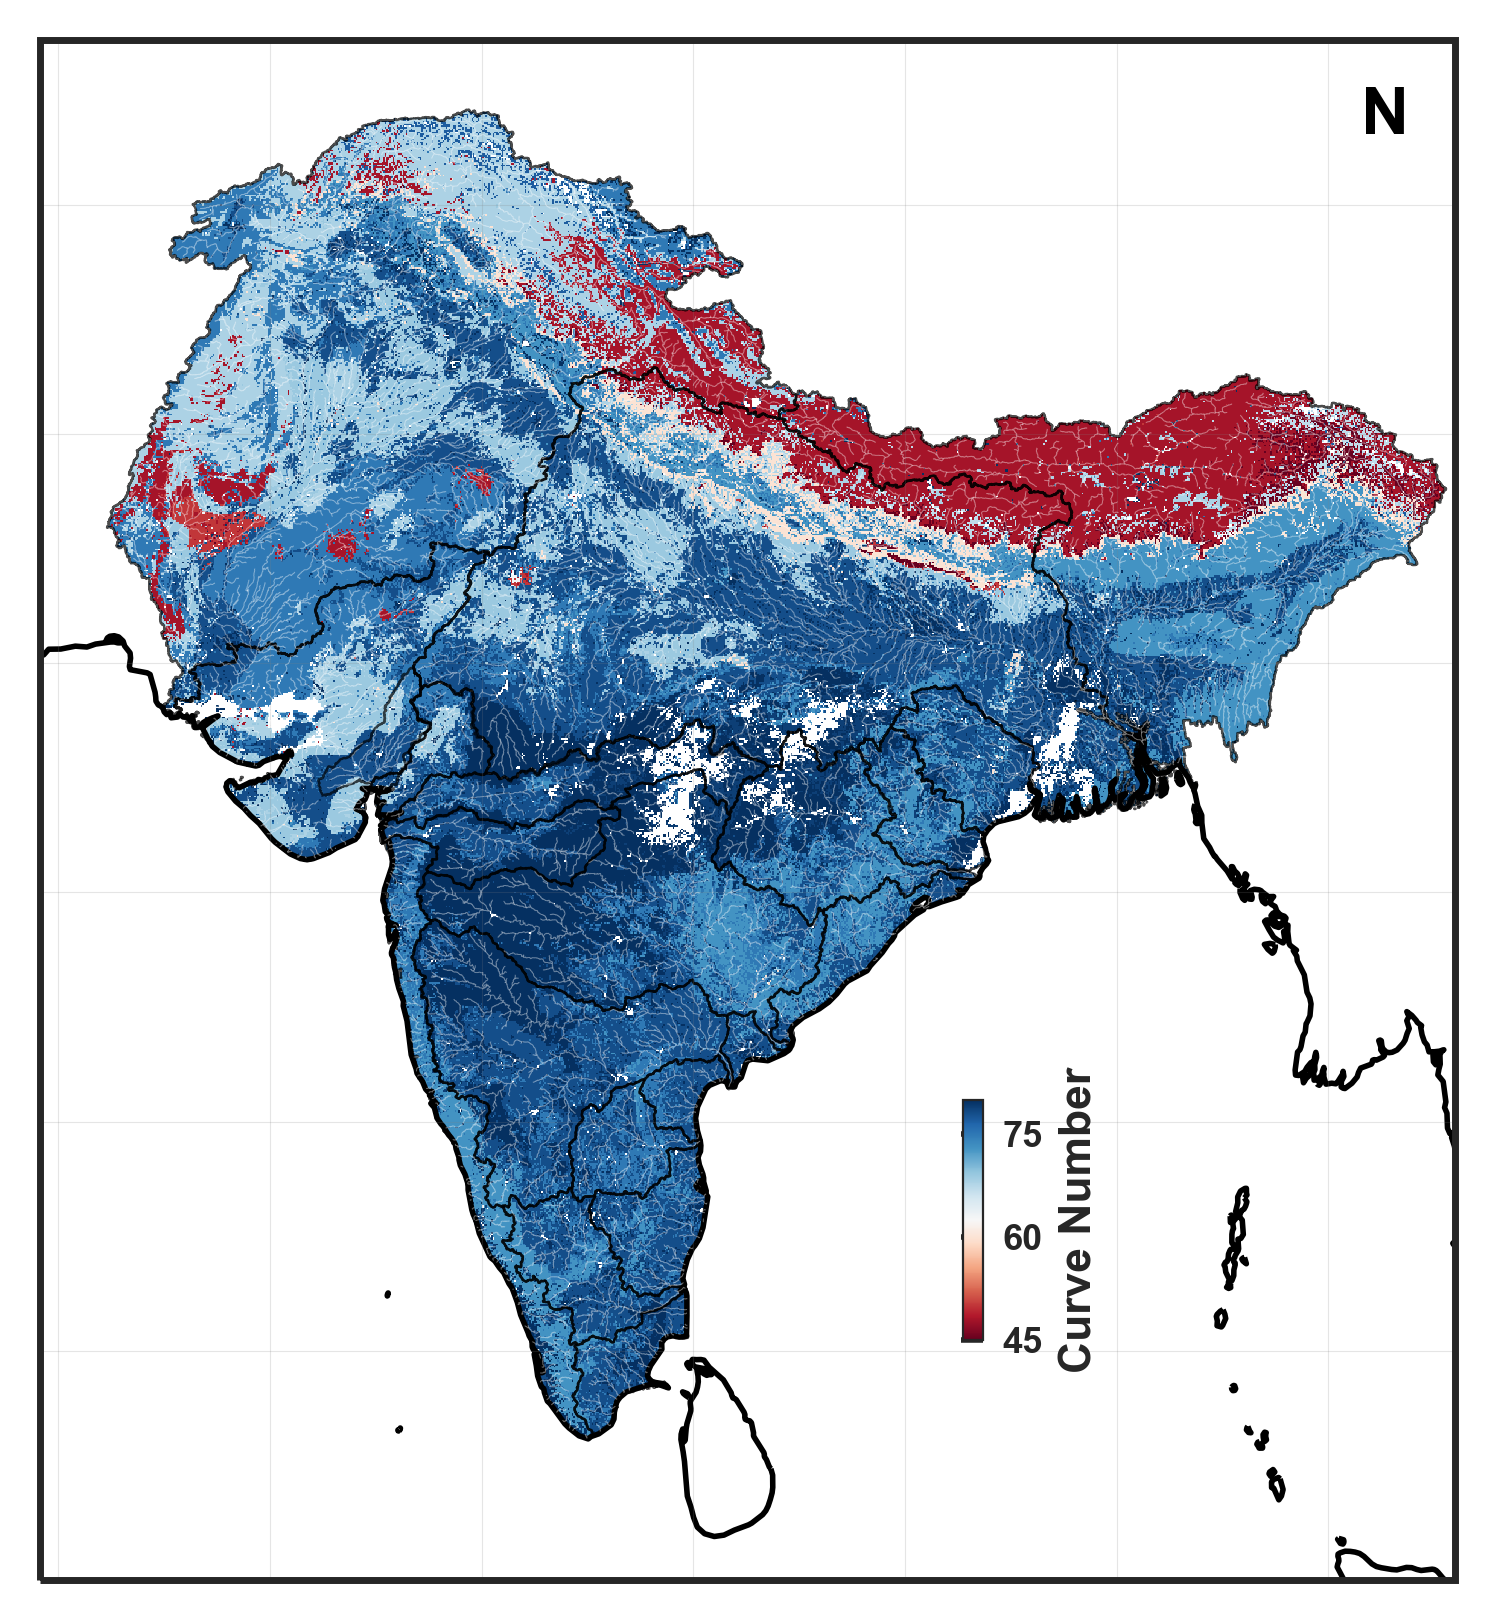

: 

In [9]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator


# Styling and font settings
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-white')

class_6= ['Built-up','Agricultural','Evergreen Broadleaf Forest','Shrubland/Wasteland','Water Bodeis','Ice-Glaciers']

ds=xr.open_mfdataset('DATA_p/Physiography/1_texture_classes.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds=ds.isel(x=np.arange(1,len(ds.x.values),3),y=np.arange(1,len(ds.y.values),3))

basin_map = gpd.read_file('DATA_r/shapefiles_new/IndiShape/IndShape.shp')
riv_map = gpd.read_file('DATA_r/shapefiles_new/India_streams/India_stream.shp')
ind_map=gpd.read_file('DATA_r/shapefiles_new/india_admin/Country/India_country.shp')
south_asia=gpd.read_file('DATA_p/shapefile/south_asia_p.shp')


num_colors = 50;marker_size = 6;marker_size2 = 5;alp = 0.1;alph = 0.05
basinEdge = 'black';basinEdge1 = 'blue'
basinLine = 0.35

# Creating the map plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={"projection": ccrs.PlateCarree()},
                       dpi=400, facecolor='white', constrained_layout=False)

ax.set_extent([64.571, 98, 5, 38.599], ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.2, color='grey', alpha=0.2, linestyle='-')


south_asia = south_asia.to_crs(ccrs.PlateCarree().proj4_init)



cn_plot=cn_da.plot(ax=ax, cmap='RdBu',vmin=45,vmax=80, add_colorbar=False)
south_asia.plot(ax=ax, cmap=None, facecolor='none', edgecolor=basinEdge, linewidth=basinLine * 1.2, alpha=0.7)
riv_map.plot(ax=ax, color='white', alpha=0.4, linewidth=basinLine * 0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
#ax.add_feature(cfeature.OCEAN, color='lightblue')

# Add North arrow
ax.text(0.95, 0.95, 'N', fontsize=12, fontweight='bold', transform=ax.transAxes, ha='center', va='center', color='black')

# Add a continuous colorbar
cbar_ax = fig.add_axes([0.62, 0.23, 0.01, 0.12])   # left,bottom, widht, height

# Draw the colorbar
cbar=plt.colorbar(cn_plot,cax=cbar_ax, orientation="vertical",shrink=0.5, pad=.16, aspect=20, label = 'Curve Number') #,label = cbar_tit
cbar.outline.set_linewidth(0.4) 
#cbar.ax.tick_params(axis='both',which='both', labelsize=4,width=1, length=3,direction='out') 

cbar.ax.yaxis.set_major_locator(MultipleLocator(15))
cbar.ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # This will set 2 minor ticks between each major tick
cbar.ax.tick_params(which='major', labelsize=6.5,width=1, length=4,direction='in') 
cbar.ax.tick_params(which='minor', labelsize=6.5,width=0.5, length=2,direction='in') 

cbar.ax.yaxis.labelpad = 3
cbar.ax.yaxis.label.set_fontsize(8)
cbar.ax.yaxis.label.set_fontweight('bold')
cbar.set_label('Curve Number', fontsize=8)
ax.set_title("")
# Save the plot
#plt.savefig("CN curve.jpeg")
